# Data Visualizations Project - Stock Market Notifications System (Email, SMS and Telegram)


The world is changing and while the world economies keep on growing. People epsecially youths and students struggle to pay their bills. As students we wanted to have at least a passive income and because we are working towards our goal to become data scientists we thought it would be much better to invest in stock market mainly tech stocks. Is there any problem with that? Definitely no but this game requires time and so we came out with a notification system which will help us to only focus on the investing/trading strategy.

Project developed by:

- Johnas Chami, number: 20220723

- Mbagwu Ozichi, number: 20220725

- Seyram Nkulenu, number: 20221380 

- Wai Kong Ng, number: 20221384

<div class="alert alert-block alert-info">

# Index
    
[1. Imports](#1)<br>
    
- [1.1 Import the needed Libraries](#1.1)<br>

- [1.2 Import the Dataset](#1.2)<br>

[2. Exploratory Data Analysis](#2)<br>
    
- [2.1 Data Exploration](#2.1)<br>
    
- [2.2 Data Pre-processing](#2.2)<br>
   
- [2.3 Data Visualization](#2.2)<br>

[3. Create the APP and the Notifications System](#3)<br>

- [3.1 Email and SMS Notifications](#3.1)<br>
    
- [3.2 Telegram Notifications](#3.2)<br>
    

</div>

<a class="anchor" id="1">

# 1. Imports

 </a> 

<a class="anchor" id="1.1">

## 1.1 Import the needed Libraries

 </a> 

In [41]:
import os 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
    
from fmp_python.fmp import FMP                                   # for financial API:  pip install fmp-python
import smtplib                                                   # for sending emails
from email.message import EmailMessage                           # for sending emails

from dash import Dash, dcc, html, Output, Input, State           # pip install dash
import plotly.express as px                               
from datetime import datetime
import plotly.graph_objects as go
import plotly.io as pio

import telepot                                               
import requests 
from datetime import datetime
from timeloop import Timeloop
from datetime import timedelta

<a class="anchor" id="1.2">

## 1.2 Import the Dataset
    
</a>

In [42]:
# Import the dataset and check it

ticker_list = pd.read_csv('nasdaq_screener_1679241423896.csv')
ticker_list

,Symbol,Name,Last Sale,Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$155.00,-0.85,-0.545%,2.687288e+12,United States,1980.0,98873837,Technology,Computer Manufacturing
1,ACN,Accenture plc Class A Ordinary Shares (Ireland),$250.00,-2.92,-1.155%,1.574350e+11,Ireland,2001.0,6470849,Technology,EDP Services
2,ADBE,Adobe Inc. Common Stock,$358.14,4.85,1.373%,1.639565e+11,United States,1986.0,6721421,Technology,Computer Software: Prepackaged Software
3,ADI,Analog Devices Inc. Common Stock,$185.85,-0.78,-0.418%,9.401269e+10,United States,NaN,6216153,Technology,Semiconductors
4,ADSK,Autodesk Inc. Common Stock,$199.11,-1.48,-0.738%,4.296147e+10,United States,NaN,2216120,Technology,Computer Software: Prepackaged Software
...,...,...,...,...,...,...,...,...,...,...,...
112,WIT,Wipro Limited Common Stock,$4.57,-0.04,-0.868%,2.502846e+10,India,NaN,1817322,Technology,EDP Services
113,XM,Qualtrics International Inc. Class A Common Stock,$17.65,-0.04,-0.226%,1.048159e+10,United States,2021.0,4275033,Technology,Computer Software: Prepackaged Software
114,ZBRA,Zebra Technologies Corporation Class A Common ...,$288.71,-6.22,-2.109%,1.484106e+10,United States,1991.0,461456,Technology,Computer peripheral equipment
115,ZM,Zoom Video Communications Inc. Class A Common ...,$69.19,-1.40,-1.983%,2.022578e+10,United States,2019.0,3762426,Technology,Computer Software: Prepackaged Software


<a class="anchor" id="2">

# 2. Exploratory Data Analysis
    
</a>

<a class="anchor" id="2.1">

## 2.1. Data Exploration
    
</a>

In [43]:
# Check the shape of the dataset
ticker_list.shape

(117, 11)

In [44]:
# Checking if there are only unique values in "Industry"
ticker_list['Industry'].unique()

array(['Computer Manufacturing', 'EDP Services',
       'Computer Software: Prepackaged Software', 'Semiconductors',
       'Computer peripheral equipment', 'Electrical Products',
       'Industrial Machinery/Components',
       'Computer Software: Programming Data Processing',
       'Retail: Computer Software & Peripheral Equipment',
       'Security Systems Services', 'Internet and Information Services',
       'Electronic Components',
       'Radio And Television Broadcasting And Communications Equipment',
       'Interactive Media'], dtype=object)

In [45]:
# Checking if there are only unique values in "Sector"
ticker_list['Sector'].unique()

array(['Technology'], dtype=object)

In [46]:
# Check the information about the dataframe and its features

ticker_list.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 117 entries, 0 to 116
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Symbol      117 non-null    object 
 1   Name        117 non-null    object 
 2   Last Sale   117 non-null    object 
 3   Net Change  117 non-null    float64
 4   % Change    117 non-null    object 
 5   Market Cap  117 non-null    float64
 6   Country     110 non-null    object 
 7   IPO Year    80 non-null     float64
 8   Volume      117 non-null    int64  
 9   Sector      117 non-null    object 
 10  Industry    117 non-null    object 
dtypes: float64(3), int64(1), object(7)
memory usage: 10.2+ KB


In [47]:
# Checking the descriptive statistics of the categorical features
ticker_list.describe(include="object").T

,count,unique,top,freq
Symbol,117,117,AAPL,1
Name,117,117,Apple Inc. Common Stock,1
Last Sale,117,117,$155.00,1
% Change,117,111,-0.628%,2
Country,110,13,United States,91
Sector,117,1,Technology,117
Industry,117,14,Computer Software: Prepackaged Software,31


In [48]:
# Checking the top and the meast Country

ticker_list["Country"].value_counts() 

United States    91
Israel            3
Ireland           2
Netherlands       2
India             2
Switzerland       2
Taiwan            2
China             1
Guernsey          1
Sweden            1
Finland           1
Germany           1
Australia         1
Name: Country, dtype: int64

In [49]:
ticker_list['Last Sale'].dtype

dtype('O')

<a class="anchor" id="2.2">

## 2.2 Data Pre-processing 
    
</a>

In [50]:
# Rename a column 
ticker_list = ticker_list.rename(columns={'Last Sale': 'Last Sale($)'})
ticker_list

,Symbol,Name,Last Sale($),Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,$155.00,-0.85,-0.545%,2.687288e+12,United States,1980.0,98873837,Technology,Computer Manufacturing
1,ACN,Accenture plc Class A Ordinary Shares (Ireland),$250.00,-2.92,-1.155%,1.574350e+11,Ireland,2001.0,6470849,Technology,EDP Services
2,ADBE,Adobe Inc. Common Stock,$358.14,4.85,1.373%,1.639565e+11,United States,1986.0,6721421,Technology,Computer Software: Prepackaged Software
3,ADI,Analog Devices Inc. Common Stock,$185.85,-0.78,-0.418%,9.401269e+10,United States,NaN,6216153,Technology,Semiconductors
4,ADSK,Autodesk Inc. Common Stock,$199.11,-1.48,-0.738%,4.296147e+10,United States,NaN,2216120,Technology,Computer Software: Prepackaged Software
...,...,...,...,...,...,...,...,...,...,...,...
112,WIT,Wipro Limited Common Stock,$4.57,-0.04,-0.868%,2.502846e+10,India,NaN,1817322,Technology,EDP Services
113,XM,Qualtrics International Inc. Class A Common Stock,$17.65,-0.04,-0.226%,1.048159e+10,United States,2021.0,4275033,Technology,Computer Software: Prepackaged Software
114,ZBRA,Zebra Technologies Corporation Class A Common ...,$288.71,-6.22,-2.109%,1.484106e+10,United States,1991.0,461456,Technology,Computer peripheral equipment
115,ZM,Zoom Video Communications Inc. Class A Common ...,$69.19,-1.40,-1.983%,2.022578e+10,United States,2019.0,3762426,Technology,Computer Software: Prepackaged Software


In [51]:
# Remove the '$' sign from the 'Last Sale($)' column
ticker_list['Last Sale($)'] = ticker_list['Last Sale($)'].str.replace('$', '')

# Remove the '%' sign from the '% Change' column
ticker_list['% Change'] = ticker_list['% Change'].str.replace('%', '')

ticker_list

C:\Users\jcamillius\AppData\Local\Temp\ipykernel_11012\3101257398.py:2: FutureWarning:

The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.



,Symbol,Name,Last Sale($),Net Change,% Change,Market Cap,Country,IPO Year,Volume,Sector,Industry
0,AAPL,Apple Inc. Common Stock,155.00,-0.85,-0.545,2.687288e+12,United States,1980.0,98873837,Technology,Computer Manufacturing
1,ACN,Accenture plc Class A Ordinary Shares (Ireland),250.00,-2.92,-1.155,1.574350e+11,Ireland,2001.0,6470849,Technology,EDP Services
2,ADBE,Adobe Inc. Common Stock,358.14,4.85,1.373,1.639565e+11,United States,1986.0,6721421,Technology,Computer Software: Prepackaged Software
3,ADI,Analog Devices Inc. Common Stock,185.85,-0.78,-0.418,9.401269e+10,United States,NaN,6216153,Technology,Semiconductors
4,ADSK,Autodesk Inc. Common Stock,199.11,-1.48,-0.738,4.296147e+10,United States,NaN,2216120,Technology,Computer Software: Prepackaged Software
...,...,...,...,...,...,...,...,...,...,...,...
112,WIT,Wipro Limited Common Stock,4.57,-0.04,-0.868,2.502846e+10,India,NaN,1817322,Technology,EDP Services
113,XM,Qualtrics International Inc. Class A Common Stock,17.65,-0.04,-0.226,1.048159e+10,United States,2021.0,4275033,Technology,Computer Software: Prepackaged Software
114,ZBRA,Zebra Technologies Corporation Class A Common ...,288.71,-6.22,-2.109,1.484106e+10,United States,1991.0,461456,Technology,Computer peripheral equipment
115,ZM,Zoom Video Communications Inc. Class A Common ...,69.19,-1.40,-1.983,2.022578e+10,United States,2019.0,3762426,Technology,Computer Software: Prepackaged Software


In [52]:
# Convert the '% Change' column to a numeric data type
ticker_list['% Change'] = pd.to_numeric(ticker_list['% Change'], errors='coerce')

<a class="anchor" id="2.3">

## 2.3 Data Visualization
    
</a>

In [53]:
data_choropleth = dict(type='choropleth',
                       locations=ticker_list['Country'],  #There are three ways to 'merge' your data with the data pre embedded in the map
                       locationmode='country names',
                       z=np.log(ticker_list['Volume']),
                       text=ticker_list['Country'],
                       colorscale='inferno'
                      )

layout_choropleth = dict(geo=dict(scope='world',  #default
                                  projection=dict(type='orthographic'
                                                 ),
                                  #showland=True,   # default = True
                                  landcolor='black',
                                  lakecolor='white',
                                  showocean=True,   # default = False
                                  oceancolor='azure'
                                 ),
                         
                         title=dict(text='World Stock Trade Map',
                                    x=.5 # Title relative position according to the xaxis, range (0,1)
                                   )
                        )

In [54]:
fig_choropleth = go.Figure(data=data_choropleth, layout=layout_choropleth)

fig_choropleth.show()

In [55]:
# Group the data by industry and calculate the mean of the '% Change' column
mean_pct_change_by_industry = ticker_list.groupby('Industry')['% Change'].mean()

# Print the result
print(mean_pct_change_by_industry)

Industry
Computer Manufacturing                                           -1.226667
Computer Software: Prepackaged Software                          -0.625097
Computer Software: Programming Data Processing                    3.278000
Computer peripheral equipment                                    -0.590250
EDP Services                                                     -1.107630
Electrical Products                                              -3.042000
Electronic Components                                            -0.740000
Industrial Machinery/Components                                  -1.280000
Interactive Media                                                -0.603000
Internet and Information Services                                -1.348500
Radio And Television Broadcasting And Communications Equipment   -1.649000
Retail: Computer Software & Peripheral Equipment                 -0.904200
Security Systems Services                                        -1.261000
Semiconductors  

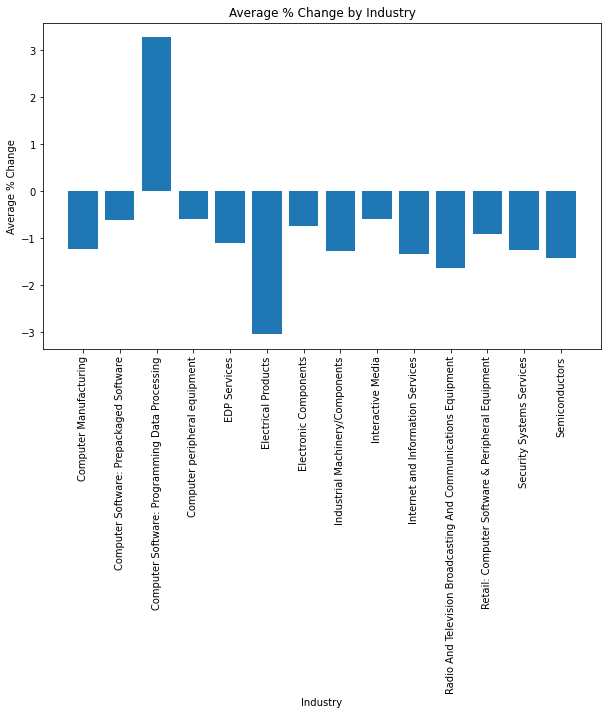

In [56]:
# create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mean_pct_change_by_industry.index, mean_pct_change_by_industry.values)
ax.set_xlabel('Industry')
ax.set_ylabel('Average % Change')
ax.set_title('Average % Change by Industry')
plt.xticks(rotation=90)
plt.show()

In [57]:
# Group the data by industry and calculate the mean of the 'Volume' column
mean_volume_by_industry = ticker_list.groupby('Industry')['Volume'].mean()

# Print the result
print(mean_volume_by_industry)

Industry
Computer Manufacturing                                            4.544282e+07
Computer Software: Prepackaged Software                           6.171253e+06
Computer Software: Programming Data Processing                    5.927003e+06
Computer peripheral equipment                                     5.991921e+06
EDP Services                                                      6.111828e+06
Electrical Products                                               5.510703e+06
Electronic Components                                             5.199477e+06
Industrial Machinery/Components                                   2.504318e+06
Interactive Media                                                 1.000198e+07
Internet and Information Services                                 5.540181e+07
Radio And Television Broadcasting And Communications Equipment    6.158654e+06
Retail: Computer Software & Peripheral Equipment                  6.948967e+06
Security Systems Services                  

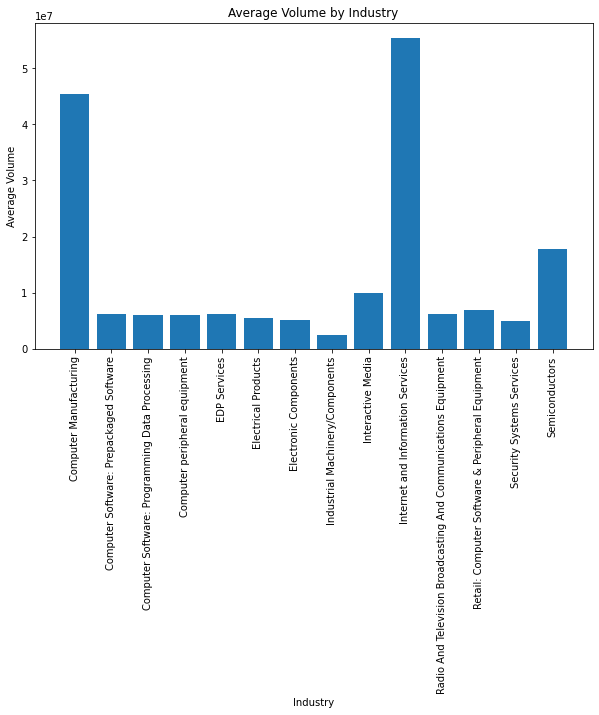

In [58]:
# create a bar chart
fig, ax = plt.subplots(figsize=(10, 6))
ax.bar(mean_volume_by_industry.index, mean_volume_by_industry.values)
ax.set_xlabel('Industry')
ax.set_ylabel('Average Volume')
ax.set_title('Average Volume by Industry')
plt.xticks(rotation=90)
plt.show()

<a class="anchor" id="3">

# 3. Create the APP and the Notifications System

 </a>

<a class="anchor" id="3.1">

## 3.1 Email and SMS Notifications

 </a> 

In [59]:
def send_alert(subject, body, to):
    msg = EmailMessage()
    msg.set_content(body)
    msg['subject'] = subject
    msg['to'] = to

    user = 'johnasc96@gmail.com'                                                   # email <-- Update here
    msg['from'] = user
    password = 'wcclgjnjmbcjmydo'                                                  # password from gmail <-- Update here

      # set server parameters
    server = smtplib.SMTP ('smtp.gmail.com', 587)                                  # create server variable
    server.starttls()
    server.login(user,password)
    server.send_message(msg)

    server.quit()

In [60]:
app = Dash(__name__)
app.layout = html.Div([
    html.H1("Stock Market Notification System (Email and SMS)", style={'textAlign': 'center'}),
    dcc.Interval(id='trigger', interval=1000*10), # 10 seconds
    dcc.Dropdown(id='ticker-name', options=ticker_list['Symbol'], value='MSFT', clearable=False, style={'width': '50%'}),
    html.Div(id='price-placeholder', children=[]),
    dcc.Graph(id='line-history', figure={}),
    html.Hr(),

    html.Div('Would you like to set up email or phone alerts for price changes?'),
    dcc.RadioItems(id='alert-permission', options=['No','Yes, email alerts', 'Yes, phone alerts'], value='No'),
    html.Div('Alert me when share price is equal or above:'),
    dcc.Input(id='alert-value', type='number', min=0, max=1000, value=0),
])

In [61]:
@app.callback(
    Output('line-history', 'figure'),
    Output('price-placeholder', 'children'),
    Input('trigger', 'n_intervals'),
    Input('ticker-name', 'value'),
    State('alert-permission', 'value'),
    State('alert-value', 'value'),
)
def display_price(_, ticker_name, alert_permission, alert_value):
    fmp = FMP(output_format='pandas', api_key='627aaecb52f1f08e5ddda8a4490ef225')                          # <-- Update here-------------------
    stock = fmp.get_quote_short(ticker_name)
    stock_history = fmp.get_historical_chart('1hour', ticker_name)
    current_time = datetime.now().strftime("%H:%M:%S")

    if alert_permission == 'Yes, phone alerts':
        if stock.price[0] >= alert_value:
            send_alert('Alert: Buy Stock',
                        f'{ticker_name} passed your alert threshold of ${alert_value} '
                        f'and is now at ${stock.price[0]} per share.',
                        '351914172220@sms.vodafone.pt')                                                  # <-- Update here-------------------

    elif alert_permission == 'Yes, email alerts':
        if stock.price[0] >= alert_value:
            send_alert('Alert: Buy Stock',
                        f'{ticker_name} passed your alert threshold of ${alert_value} '
                        f'and is now at ${stock.price[0]} per share.',
                        'EmailToAddress@gmail.com')                                              # <-- Update here-------------------

    history_fig = px.line(stock_history, x='date', y='high')
    return history_fig, html.Pre(f"Time: {current_time}\nPrice: ${stock.price[0]}")


In [62]:
if __name__ == '__main__':
    app.run()

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


 * Running on http://127.0.0.1:8050/ (Press CTRL+C to quit)
127.0.0.1 - - [08/Apr/2023 19:27:45] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:27:46] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:27:46] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:27:46] "GET /_favicon.ico?v=2.9.2 HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:27:46] "GET /_dash-component-suites/dash/dcc/async-dropdown.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:27:46] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:27:46] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:27:50] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:27:57] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:28:08] "POST /_dash-update-component HTTP/1.1" 200 -
127.0.0.1 - - [08/Apr/2023 19:28:18] "POST /_dash-update-component HTTP/1.1" 

<a class="anchor" id="3.2">

## 3.2 Telegram Notifications

 </a> 

In [63]:
# Define a Python function to get real time stock data
# This function will accept one input ticker as its parameter

def getStockData(ticker):
    base_url = "https://financialmodelingprep.com/api/v3/quote/"     # Split the HTTP request URL into three parts so that we can build a dynamic API request URL based on the input ticker and individual API key.
    key = "627aaecb52f1f08e5ddda8a4490ef225"
    full_url = base_url + ticker + "?apikey=" + key
    r = requests.get(full_url)                                       # Use the Python requests module to get the real time stock data via the FMP API request URL and return the data in JSON format.
    stock_data= r.json()
    return stock_data

In [64]:
def generateMessage(data):
    symbol = data[0]['symbol']
    price = data[0]["price"]
    changesPercent = data[0]["changesPercentage"]
    timestamp = data[0]['timestamp']
    
    current = datetime.fromtimestamp(timestamp)
    message = str(current)
    message += "\n" + symbol 
    message += "\n$" + str(price)
    
    if(changesPercent < -2):
        message += "\nWarning! Price drop more than 2%!"
        
    return message

In [65]:
def sendMessage(text):
    token = '6138788409:AAFVqj5EETnfvfqs47SPgV5ZAK-nS1cDMP8'
    receiver_id = 5817562148      #In Numeric Format
    bot = telepot.Bot(token)
    bot.sendMessage(receiver_id,text)

In [66]:
tl = Timeloop()

# Define a list of tickers for the top 50 tech stocks
tickers = ["AAPL", "MSFT", "AMZN", "GOOG", "FB", "TSLA", "NVDA", "PYPL", "INTC", "ASML", "NFLX", "ADBE", "CRM", "CSCO", "AVGO", "ORCL", "TXN", "SHOP", "SQ", "BIDU", "SE", "JD", "VMW", "IBM", "AMD", "MU", "NOW", "UBER", "LRCX", "ADI", "SNPS", "TEL", "SAP", "QCOM", "TEAM", "KLAC", "CRWD", "SNOW", "MELI", "OKTA", "ANSS", "FTNT", "CDNS", "DDOG", "ZS", "TWLO", "PANW", "WDAY", "DOCU", "NET"]

@tl.job(interval=timedelta(seconds=60))
def run_tasks():
    for ticker in tickers:
        # Get real-time stock data using FMP API
        api_key = "627aaecb52f1f08e5ddda8a4490ef225"
        url = f"https://financialmodelingprep.com/api/v3/quote/{ticker}?apikey={api_key}"
        response = requests.get(url)
        real_time_data = response.json()

        # Generate message for the stock
        textMessage = generateMessage(real_time_data)

        # Send message using appropriate method
        sendMessage(textMessage)

tl.start(block=True)


[2023-04-08 19:31:27,506] [timeloop] [INFO] Starting Timeloop..
[2023-04-08 19:31:27,509] [timeloop] [INFO] Registered job <function run_tasks at 0x0000022AED6DD550>
[2023-04-08 19:31:27,510] [timeloop] [INFO] Timeloop now started. Jobs will run based on the interval set


Exception in thread Thread-38:
Traceback (most recent call last):
  File "C:\Users\jcamillius\Anaconda3\lib\threading.py", line 973, in _bootstrap_inner
    self.run()
  File "C:\Users\jcamillius\Anaconda3\lib\site-packages\timeloop\job.py", line 19, in run
    self.execute(*self.args, **self.kwargs)
  File "C:\Users\jcamillius\AppData\Local\Temp\ipykernel_11012\989170185.py", line 16, in run_tasks
  File "C:\Users\jcamillius\AppData\Local\Temp\ipykernel_11012\3607454363.py", line 2, in generateMessage
IndexError: list index out of range


[2023-04-08 19:32:48,287] [timeloop] [INFO] Stopping job <function run_tasks at 0x0000022AED6DD550>
[2023-04-08 19:32:48,288] [timeloop] [INFO] Timeloop exited.
